## Primena K-Means algoritma pri analizi korisnika kreditnih kartica
> Ovaj dokument služi da ukratko opiše klasterizaciju korisnika i prikaže i analizira rezultate te analize.

> Detaljna analiza korisnika (biranje broja klastera, biranje broja principalnih komponenti itd.) se može naći u datoteci 'kmeans_pca.py'

In [ ]:
from data_preprocessing import load_and_preprocess
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

import warnings
warnings.filterwarnings(action="ignore")

%matplotlib inline

## Pretprocesiranje podataka
U ovom koraku se:
- Dopunjuju nedostajući podaci
- Izvode novi atributi
- Zanemaruju outlieri
- Normalizuju podaci

In [10]:
original, preprocessed = load_and_preprocess()

## Redukcija dimenzionalnosti
U ovom koraku se redukuje dimenzionalnost skupa podataka. Dimenzionalnost se redukuje u cilju:
1. Vizuelizacije podataka
2. Poboljšanja samog klasterovanja (Veliki broj dimenzija sa sobom nosi i "curse of dimensionality", koji može da naruši i performanse K-Means algoritma).
Izabrani metod redukcije dimenzionalnosti je *Principal Component Analysis*.

In [11]:
pca = PCA(n_components=5)
reduced_dataframe = pca.fit_transform(preprocessed)

## Klasterovanje podataka
U ovom dokumentu primenjujemo K-Means algoritam kao izabrani algoritam klasterovanja podataka. Nakon primene *elbow* metode utvrdili smo da je odgovarajući broj klastera 5.

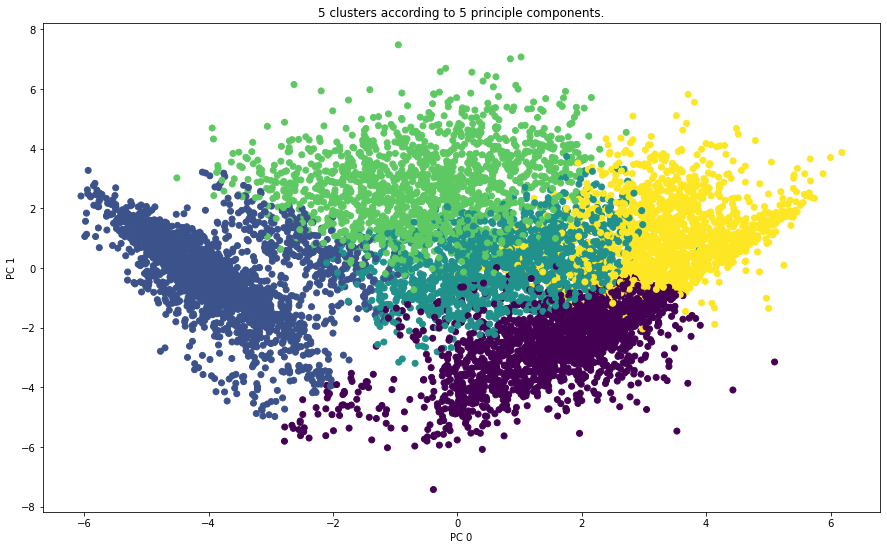

In [ ]:
alg = KMeans(n_clusters=5)
label = alg.fit_predict(reduced_dataframe)

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
ax.set_title("5 clusters according to 5 principle components.")
ax.set_xlabel("PC 0")
ax.set_ylabel("PC 1")
plt.scatter(reduced_dataframe[:, 0], reduced_dataframe[:, 1], c=label.astype(float))
plt.show()

## Analiza klastera
### Distrubucija vrednosti svakog atributa svakog klastera
Plotujemo za svaki atribut dva grafika:
1. Grafik koji prikazuje boxplot vrednosti tog atributa svakog klastera
2. Grafik koji prikazuje srednje vrednosti tog atributa svakog klastera

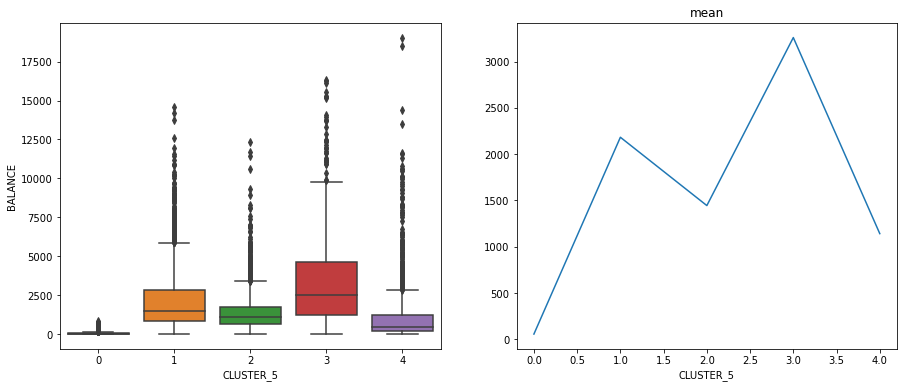

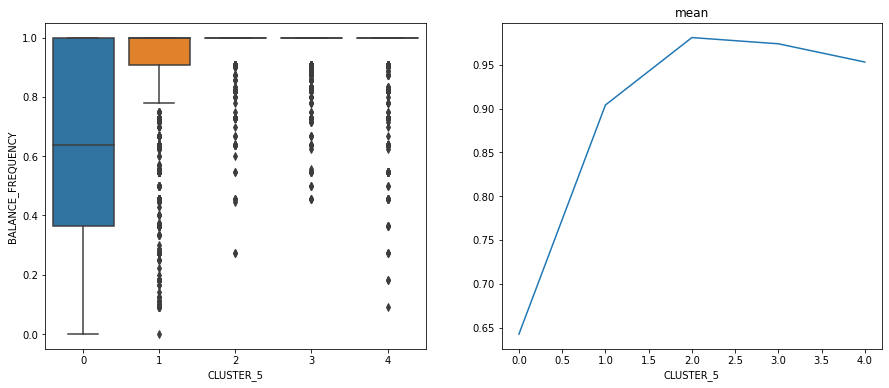

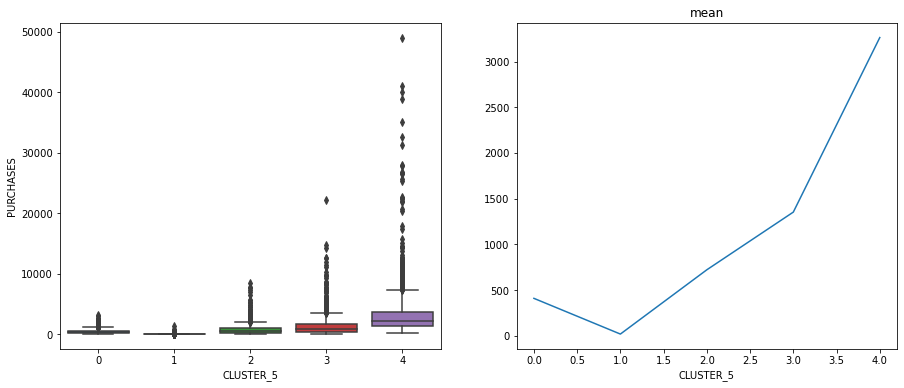

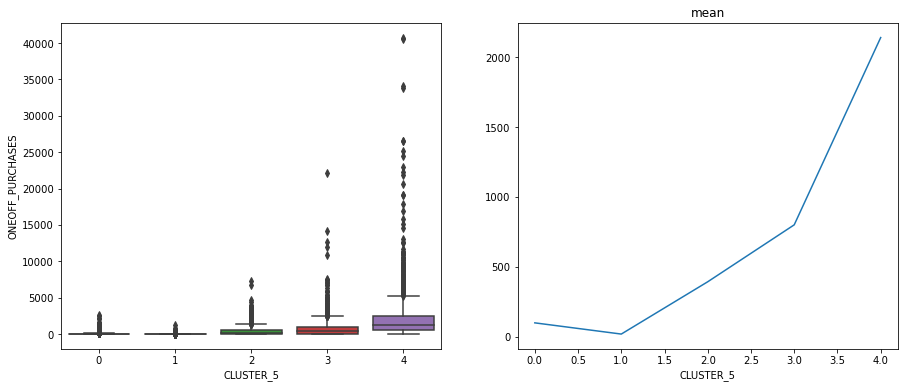

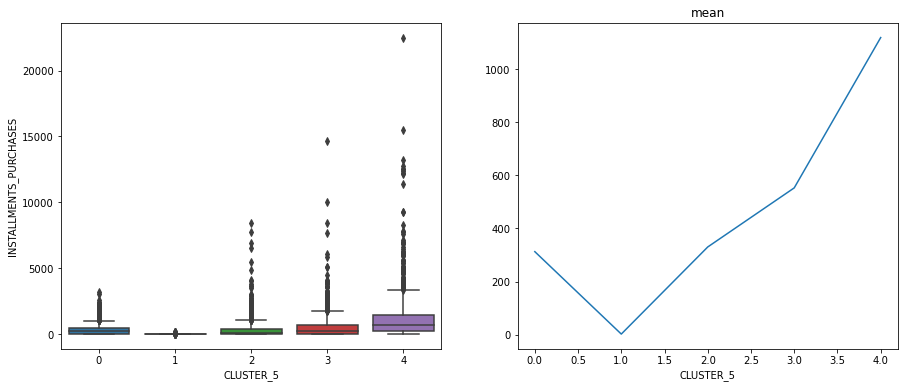

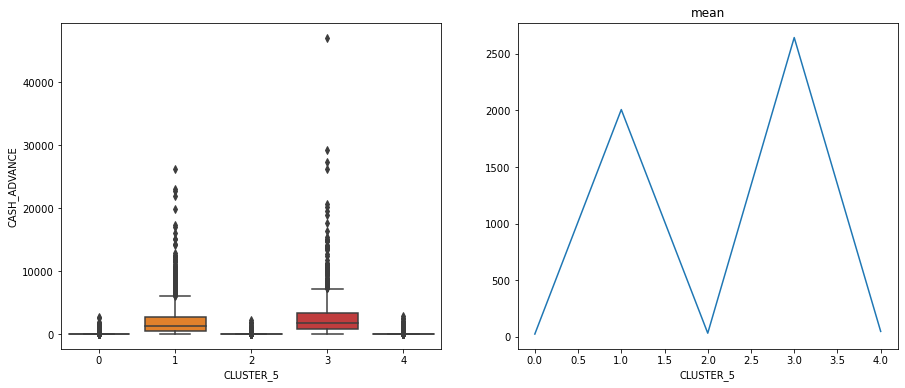

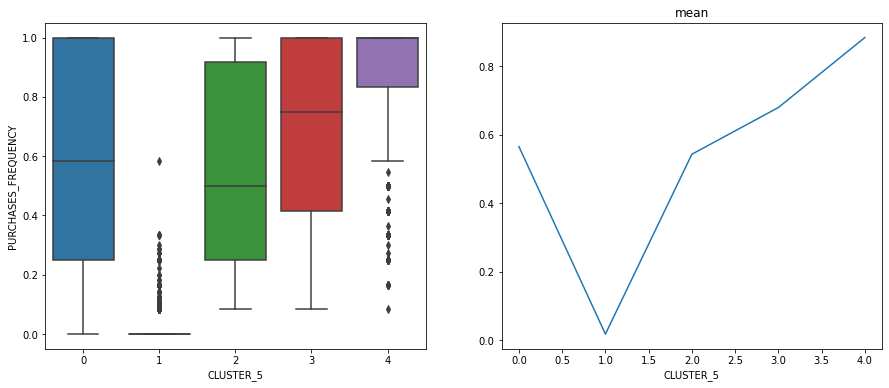

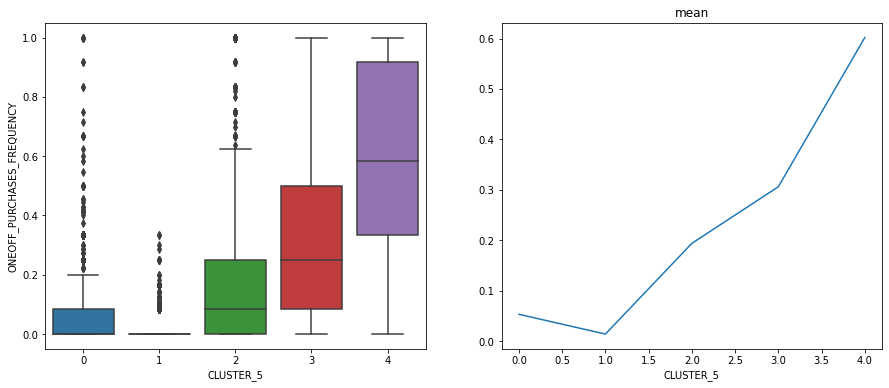

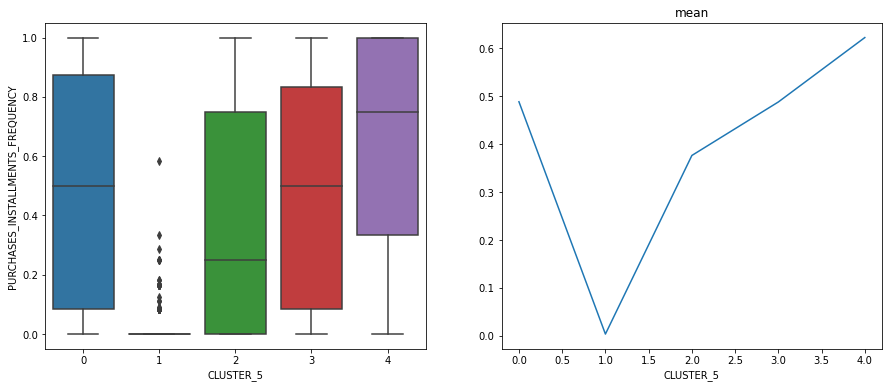

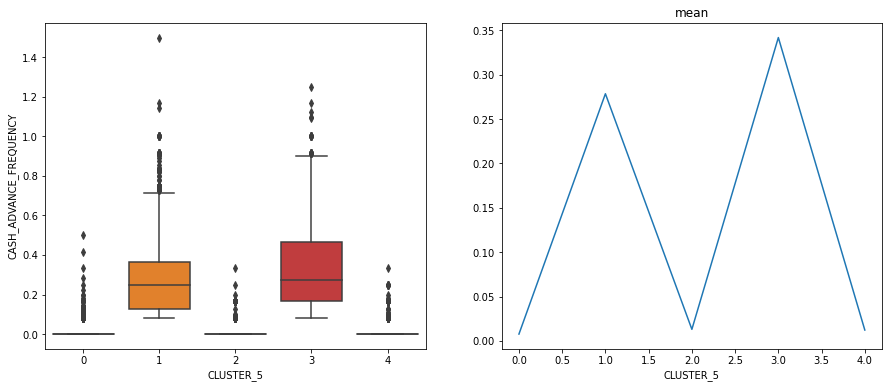

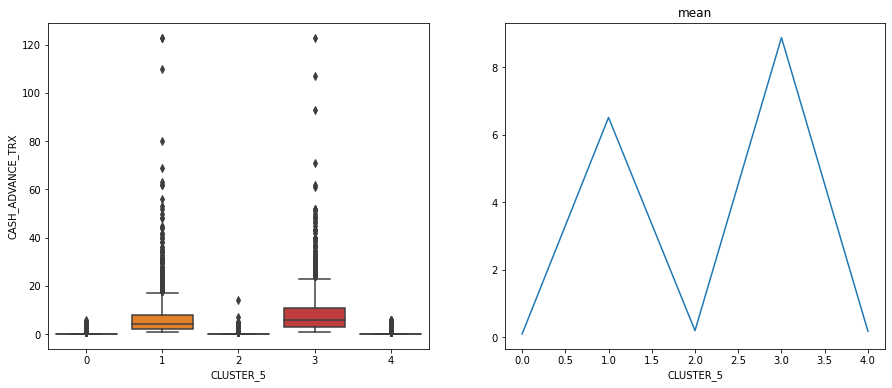

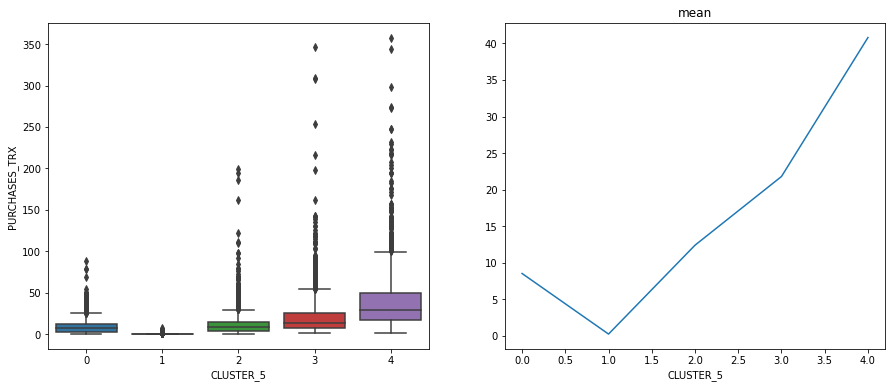

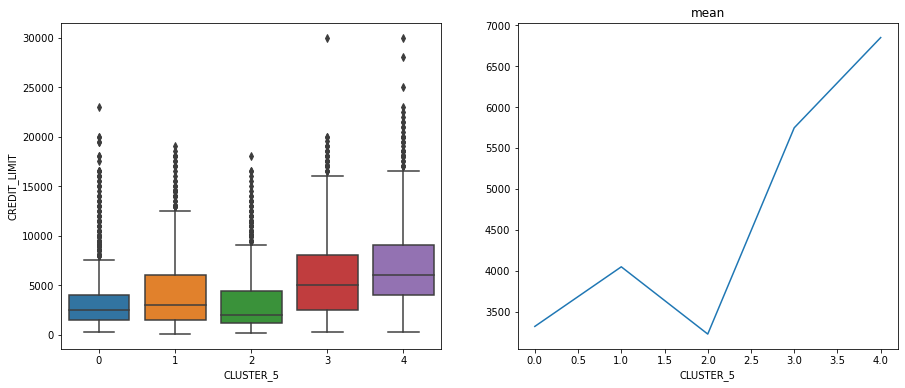

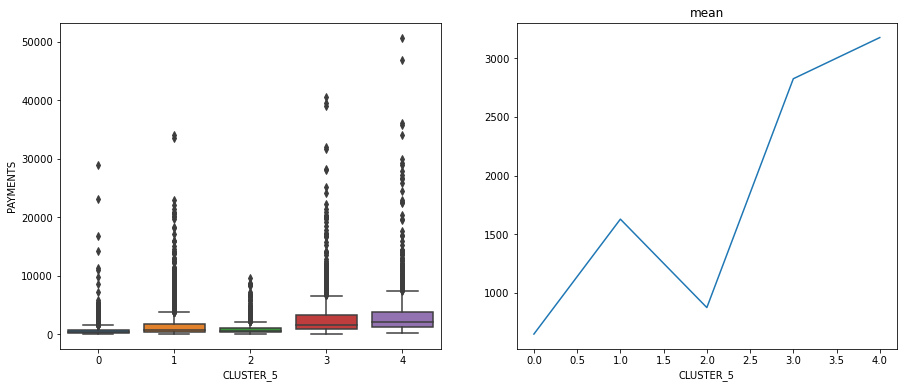

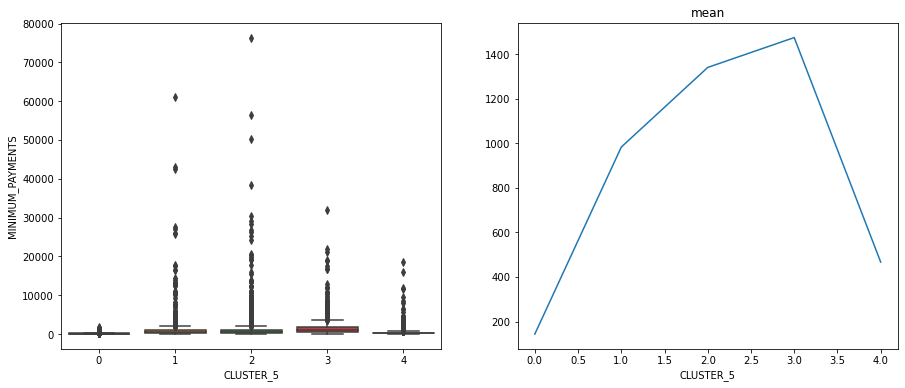

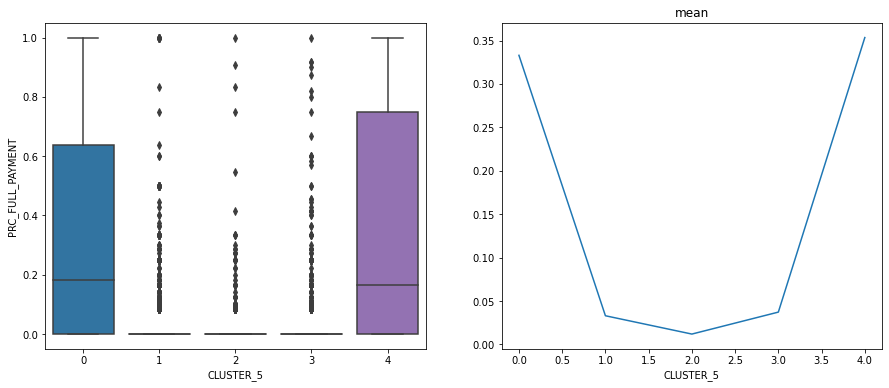

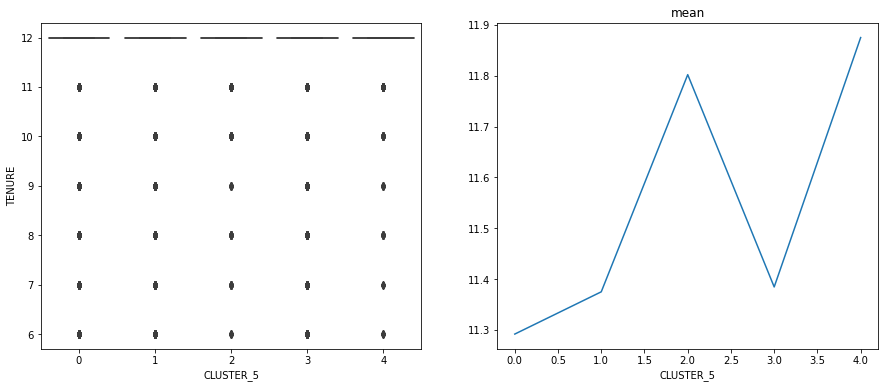

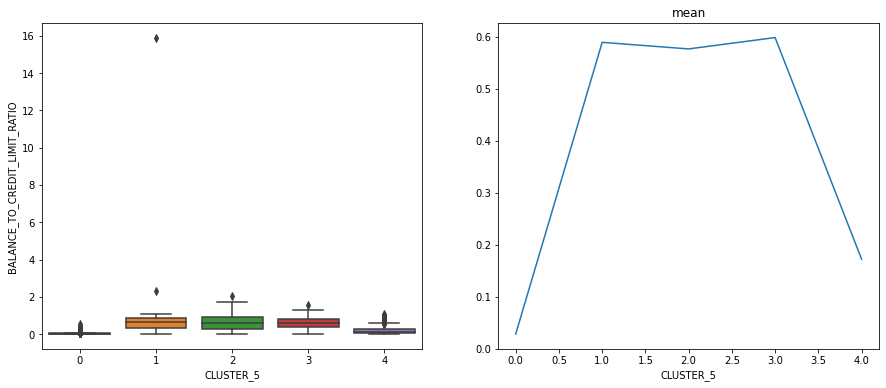

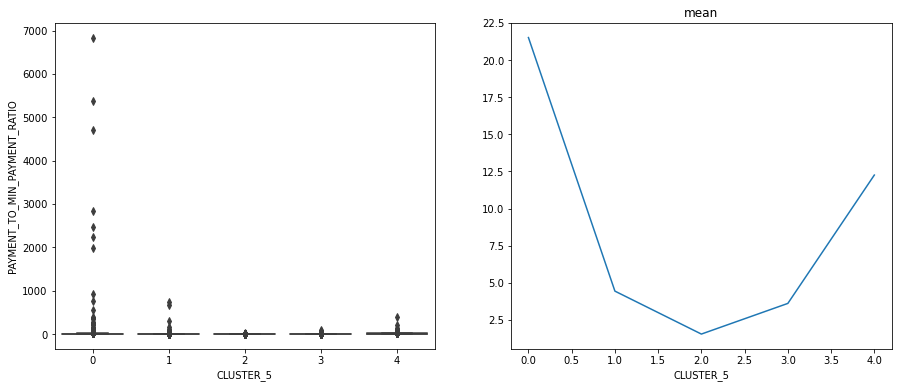

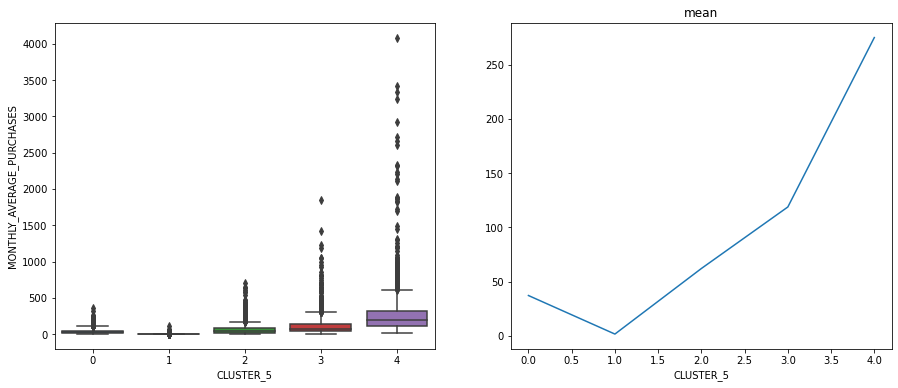

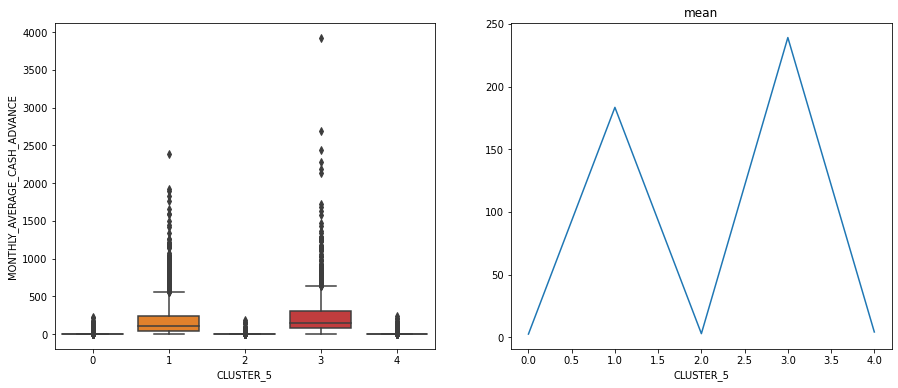

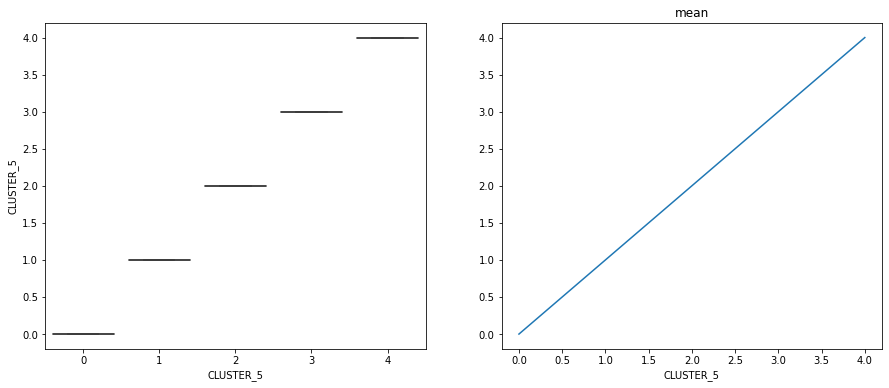

In [13]:
original['CLUSTER_5'] = label

for c in original:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)
    sb.boxplot(x = 'CLUSTER_5', y = c, data=original, ax=ax1)
    avg = original.groupby('CLUSTER_5')[c].agg('mean')
    avg.plot(ax=ax2, title='mean')
    plt.show()

Na osnovu analize distribucija vrednosti svakog atributa svakog klastera dolazimo da sledećih saznanja o svakom klasteru:

### Klaster 0
Ovaj klaster je veoma specifičan po **generalnoj pasivnosti korisnika**. Svi parametri su im izuzetno niski. Ukoliko korisnici ovog klastera kupuju, kupuju na rate (*PURCHASES_INSTALLMENTS_FREQUENCY* i *INSTALLMENTS_PURCHASES* idu ovome u prilog).

### Klaster 1
Ovaj klaster karakterišu **korisnici koji uzimaju novac unapred (na zajam)** (visoki *CASH_ADVANCE* i *CASH_ADVANCE_FREQUENCY*, a niski parametri kupovina). Takođe, ovi korisnici su i **riskantni** zbog nepovoljnog odnosa stanja i limita (veoma visok *BALANCE_TO_CREDIT_LIMIT_RATIO*).

### Klaster 2
Klaster 1 čine **česti korisnici** (najviši parametar *BALANCE_FREQUENCY*). Količina sredstava koju troše ili uplaćuju na karticu je vrlo niska (mali parametri svih vrsta kupovina, mala vrednost *CREDIT_LIMIT*)

### Klaster 3
Ovaj klaster čine **neodgovorni korisnici**. Do ovog zaključka dolazimo zato što:
1. Korisnici imaju nepovoljan odnos stanja i limita (*BALANCE_TO_CREDIT_LIMIT_RATIO* viši od ostalih klastera).
2. Korisnici imaju najveću vrednost stanja (*BALANCE*).
3. Korisnici su vodeći po količini novca koja im je data unapred (*CASH_ADVANCE* i *CASH_ADVANCE_FREQUENCY*). Pri ovoj analizi uzeta je definicija atributa CASH_ADVANCE sa sajta investopedia.com

### Klaster 4
Korisnici ovog klastera su **frekventni i odgovorni korisnici**, jer: 
1. Kupuju veoma frekventno (vodeći *PURCHASES_FREQUENCY*)
2. Kupuju na različite načine (visoke frekvencije kupovine i na rate i odjednom)
3. Kupuju u velikoj količini (vodeći *PURCHASES*, *INSTALLMENTS_PURCHASES* i *ONE_OFF_PURCHASES*).
4. Ne uzimaju novac unapred (nizak *CASH ADVANCE*)
5. Imaju povoljan odnos stanja i limita (veoma nizak *BALANCE_TO_CREDIT_LIMIT_RATIO*).

> Napomena: Od pokretanja do pokretanja algoritma zavisi koji je tačan redosled navedenih klastera, ali se karakteristike klastera ne menjaju

Autori:
- Vera Kovačević
- Milan Đurić
- Bojan Popržen